In [1]:
import pandas as pd

df = pd.read_csv("data/train.csv")
df = pd.read_csv("data/train.csv")
df = df.dropna()
X1 = df["question1"].values
X2 = df["question2"].values
y = df["is_duplicate"].values
X= [X1, X2]

In [2]:
import numpy as np
length = [len(x.split()) for x in X[0]]
length.extend([len(x.split()) for x in X[1]])

In [3]:
from hedgeable_ai.models.nn.utils import generator

Using TensorFlow backend.


In [4]:
%%time

# batch_X = generator(X, 128) 

CPU times: user 0 ns, sys: 0 ns, total: 0 ns
Wall time: 5.72 µs


In [5]:
# batch_y = generator([y], 128)

In [6]:
maxlen = 2 * int(np.mean(length))

In [7]:
from hedgeable_ai.functions.preprocessing import SentenceProcessor

processor = SentenceProcessor(None, "w2v", maxlen=maxlen, vector_file_path="data/GoogleNews-vectors-negative300.bin")

In [8]:
df.head()

id  qid1  qid2                                          question1  \
0   0     1     2  What is the step by step guide to invest in sh...   
1   1     3     4  What is the story of Kohinoor (Koh-i-Noor) Dia...   
2   2     5     6  How can I increase the speed of my internet co...   
3   3     7     8  Why am I mentally very lonely? How can I solve...   
4   4     9    10  Which one dissolve in water quikly sugar, salt...   

                                           question2  is_duplicate  
0  What is the step by step guide to invest in sh...             0  
1  What would happen if the Indian government sto...             0  
2  How can Internet speed be increased by hacking...             0  
3  Find the remainder when [math]23^{24}[/math] i...             0  
4            Which fish would survive in salt water?             0

In [14]:
import tensorflow as tf
from hedgeable_ai.models.nn.rnn import RNNModel
from hedgeable_ai.models.nn.ff import MLPModel
from hedgeable_ai.functions.classification.nn import MultiNNClassifier


conf = {"model":[{"name": "dense", "num_hidden": 10, "is_batch": True, "activation": tf.nn.relu}],
        "input_model":[{"name":"lnlstm", "num_units":256, "activation":tf.nn.tanh,
                         "layer_norm":True, "drop_rate":0.0},
                       {"name":"lnlstm", "num_units":256, "activation":tf.nn.tanh,
                         "layer_norm":True, "drop_rate":0.0},],
        "learning_rate": 1e-3,
        "learning_rate_decay_step": 10,
        "learning_rate_decay": 0.9,
        "learning_rate_minimum": 1e-4,
        "batch_size":128,
       }


tf.reset_default_graph()
N = 1000000000
input_model = [RNNModel, RNNModel]
output_model = MLPModel
model = MultiNNClassifier([300, 300], 1, input_model, output_model, conf, processor=processor, is_sequence=True)
model.train([X[0][:N], X[1][:N]], y[:N], num_epochs=1000, batch_log_freq=100, is_processed=False, 
            batch_bar=True, is_memory_intensive=False)

/home/tomoaki/anaconda3/lib/python3.6/site-packages/tensorflow/python/util/tf_inspect.py:45: DeprecationWarning: inspect.getargspec() is deprecated, use inspect.signature() or inspect.getfullargspec()
  if d.decorator_argspec is not None), _inspect.getargspec(target))
/home/tomoaki/anaconda3/lib/python3.6/site-packages/tensorflow/python/util/tf_inspect.py:45: DeprecationWarning: inspect.getargspec() is deprecated, use inspect.signature() or inspect.getfullargspec()
  if d.decorator_argspec is not None), _inspect.getargspec(target))
/home/tomoaki/anaconda3/lib/python3.6/site-packages/tensorflow/python/util/tf_inspect.py:45: DeprecationWarning: inspect.getargspec() is deprecated, use inspect.signature() or inspect.getfullargspec()
  if d.decorator_argspec is not None), _inspect.getargspec(target))

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/3159 [00:00<?, ?it/s]

Model saved in file: params/model.ckpt




  0%|          | 1/3159 [00:00<29:44,  1.77it/s]

  0%|          | 2/3159 [00:00<26:03,  2.02it/s]

  0%|          | 3/3159 [00:01<23:26,  2.24it/s]

  0%|          | 4/3159 [00:01<21:33,  2.44it/s]

  0%|          | 5/3159 [00:01<20:19,  2.59it/s]

  0%|          | 6/3159 [00:02<19:33,  2.69it/s]

  0%|          | 7/3159 [00:02<19:10,  2.74it/s]

  0%|          | 8/3159 [00:02<18:36,  2.82it/s]

  0%|          | 9/3159 [00:03<18:09,  2.89it/s]

  0%|          | 10/3159 [00:03<17:49,  2.94it/s]

  0%|          | 11/3159 [00:03<18:15,  2.87it/s]

  0%|          | 12/3159 [00:04<17:58,  2.92it/s]

  0%|          | 13/3159 [00:04<17:46,  2.95it/s]

  0%|          | 14/3159 [00:04<17:35,  2.98it/s]

  0%|          | 15/3159 [00:05<17:36,  2.98it/s]

  1%|          | 16/3159 [00:05<17:41,  2.96it/s]

  1%|          | 17/3159 [00:05<17:36,  2.97it/s]

  1%|          | 18/3159 [00:06<17:31,  2.99it/s]

  1%|          | 19/3159 [00:06<17:25,  3.00it/s]

  1%|          | 20/3159 [00:06<17:24,

 10%|▉         | 303/3159 [01:39<15:25,  3.08it/s]


 14%|█▍        | 454/3159 [02:30<14:42,  3.07it/s]


 19%|█▉        | 605/3159 [03:19<13:46,  3.09it/s]


 24%|██▍       | 756/3159 [04:08<13:00,  3.08it/s]


 29%|██▊       | 907/3159 [04:57<12:10,  3.08it/s]


 33%|███▎      | 1057/3159 [05:46<11:25,  3.07it/s]


 38%|███▊      | 1205/3159 [06:34<10:36,  3.07it/s]


 43%|████▎     | 1353/3159 [07:22<09:47,  3.07it/s]


 48%|████▊     | 1501/3159 [08:10<08:58,  3.08it/s]


 52%|█████▏    | 1649/3159 [08:58<08:10,  3.08it/s]


 57%|█████▋    | 1797/3159 [09:47<07:22,  3.08it/s]


 62%|██████▏   | 1945/3159 [10:36<06:43,  3.01it/s]


 66%|██████▋   | 2093/3159 [11:25<05:48,  3.06it/s]


 71%|███████   | 2241/3159 [12:13<04:59,  3.06it/s]


 76%|███████▌  | 2389/3159 [13:01<04:12,  3.05it/s]


 80%|████████  | 2537/3159 [13:50<03:23,  3.06it/s]


 85%|████████▍ | 2685/3159 [14:38<02:34,  3.06it/s]


 90%|████████▉ | 2833/3159 [15:26<01:46,  3.06it/s]


 94%|█████████▍| 2981/3159 [16:15<00:58,  3.06it/s]


 99%|█████████▉| 3129/3159 [17:03<00:09,  3.06it/s]


  4%|▍         | 121/3159 [00:40<16:26,  3.08it/s]


  9%|▊         | 272/3159 [01:29<15:37,  3.08it/s]


 13%|█▎        | 423/3159 [02:18<14:50,  3.07it/s]


 18%|█▊        | 574/3159 [03:07<13:58,  3.08it/s]


 23%|██▎       | 725/3159 [03:56<13:10,  3.08it/s]


 28%|██▊       | 876/3159 [04:45<12:21,  3.08it/s]


 33%|███▎      | 1027/3159 [05:34<11:29,  3.09it/s]


 37%|███▋      | 1175/3159 [06:22<10:44,  3.08it/s]


 42%|████▏     | 1323/3159 [07:10<09:56,  3.08it/s]


 47%|████▋     | 1471/3159 [07:58<09:08,  3.08it/s]


 51%|█████▏    | 1619/3159 [08:46<08:19,  3.09it/s]


 56%|█████▌    | 1767/3159 [09:34<07:34,  3.06it/s]


 61%|██████    | 1915/3159 [10:22<06:44,  3.08it/s]


 65%|██████▌   | 2063/3159 [11:10<05:55,  3.09it/s]


 70%|██████▉   | 2211/3159 [11:58<05:08,  3.07it/s]


 75%|███████▍  | 2359/3159 [12:46<04:19,  3.09it/s]


 79%|███████▉  | 2507/3159 [13:34<03:30,  3.09it/s]


 84%|████████▍ | 2655/3159 [14:22<02:43,  3.09it/s]


 89%|████████▊ | 2803/3159 [15:10<01:55,  3.07it/s]


 93%|█████████▎| 2951/3159 [15:58<01:07,  3.09it/s]


 98%|█████████▊| 3099/3159 [16:46<00:19,  3.08it/s]


  3%|▎         | 90/3159 [00:29<16:37,  3.08it/s]


  8%|▊         | 241/3159 [01:18<15:49,  3.07it/s]


 12%|█▏        | 392/3159 [02:07<14:56,  3.09it/s]


 17%|█▋        | 543/3159 [02:56<14:10,  3.07it/s]


 22%|██▏       | 694/3159 [03:45<13:19,  3.08it/s]


 27%|██▋       | 845/3159 [04:34<12:32,  3.08it/s]


 32%|███▏      | 996/3159 [05:23<11:41,  3.08it/s]


 36%|███▌      | 1145/3159 [06:11<10:54,  3.08it/s]


 41%|████      | 1293/3159 [06:59<10:04,  3.09it/s]


 46%|████▌     | 1441/3159 [07:47<09:18,  3.08it/s]


 50%|█████     | 1589/3159 [08:35<08:28,  3.08it/s]


 55%|█████▍    | 1737/3159 [09:23<07:41,  3.08it/s]


 60%|█████▉    | 1885/3159 [10:11<06:53,  3.08it/s]


 64%|██████▍   | 2033/3159 [10:59<06:04,  3.09it/s]


 69%|██████▉   | 2181/3159 [11:47<05:16,  3.09it/s]


 74%|███████▎  | 2329/3159 [12:35<04:28,  3.09it/s]


 78%|███████▊  | 2477/3159 [13:23<03:41,  3.08it/s]


 83%|████████▎ | 2625/3159 [14:11<02:53,  3.08it/s]


 88%|████████▊ | 2773/3159 [14:59<02:05,  3.07it/s]


 92%|█████████▏| 2921/3159 [15:48<01:17,  3.08it/s]


 97%|█████████▋| 3069/3159 [16:36<00:29,  3.09it/s]


  2%|▏         | 59/3159 [00:19<16:44,  3.08it/s]


  7%|▋         | 211/3159 [01:08<15:58,  3.08it/s]


 11%|█▏        | 362/3159 [01:57<15:04,  3.09it/s]


 16%|█▌        | 513/3159 [02:46<14:19,  3.08it/s]


 21%|██        | 664/3159 [03:35<13:28,  3.08it/s]


 26%|██▌       | 815/3159 [04:24<12:41,  3.08it/s]


 31%|███       | 966/3159 [05:13<11:50,  3.09it/s]


 35%|███▌      | 1115/3159 [06:01<11:05,  3.07it/s]


 40%|███▉      | 1263/3159 [06:49<10:15,  3.08it/s]


 45%|████▍     | 1411/3159 [07:37<09:25,  3.09it/s]


 49%|████▉     | 1559/3159 [08:25<08:38,  3.08it/s]


 54%|█████▍    | 1707/3159 [09:13<07:51,  3.08it/s]


 59%|█████▊    | 1855/3159 [10:01<07:01,  3.09it/s]


 63%|██████▎   | 2003/3159 [10:49<06:14,  3.08it/s]


 68%|██████▊   | 2151/3159 [11:37<05:28,  3.07it/s]


 73%|███████▎  | 2299/3159 [12:25<04:39,  3.08it/s]


 77%|███████▋  | 2447/3159 [13:13<03:51,  3.07it/s]


 82%|████████▏ | 2595/3159 [14:01<03:03,  3.07it/s]


 87%|████████▋ | 2743/3159 [14:49<02:14,  3.08it/s]


 92%|█████████▏| 2891/3159 [15:37<01:27,  3.07it/s]


 96%|█████████▌| 3039/3159 [16:25<00:39,  3.07it/s]


  1%|          | 28/3159 [00:09<16:56,  3.08it/s]


  6%|▌         | 181/3159 [00:58<16:07,  3.08it/s]


 11%|█         | 332/3159 [01:47<15:17,  3.08it/s]


 15%|█▌        | 483/3159 [02:36<14:27,  3.09it/s]


 20%|██        | 634/3159 [03:25<13:38,  3.09it/s]


 25%|██▍       | 785/3159 [04:14<12:49,  3.08it/s]


 30%|██▉       | 936/3159 [05:03<12:00,  3.09it/s]


 34%|███▍      | 1086/3159 [05:52<11:12,  3.08it/s]


 39%|███▉      | 1234/3159 [06:40<10:26,  3.08it/s]


 44%|████▎     | 1382/3159 [07:28<09:40,  3.06it/s]


 48%|████▊     | 1530/3159 [08:16<08:45,  3.10it/s]


 53%|█████▎    | 1678/3159 [09:04<08:00,  3.08it/s]


 58%|█████▊    | 1826/3159 [09:52<07:10,  3.09it/s]


 62%|██████▏   | 1974/3159 [10:40<06:23,  3.09it/s]


 67%|██████▋   | 2122/3159 [11:28<05:35,  3.09it/s]


 72%|███████▏  | 2270/3159 [12:16<04:48,  3.08it/s]


 77%|███████▋  | 2418/3159 [13:04<04:00,  3.08it/s]


 81%|████████  | 2566/3159 [13:52<03:12,  3.08it/s]


 86%|████████▌ | 2714/3159 [14:40<02:23,  3.10it/s]


 91%|█████████ | 2862/3159 [15:28<01:36,  3.08it/s]


 95%|█████████▌| 3010/3159 [16:16<00:48,  3.07it/s]


100%|██████████| 3159/3159 [17:04<00:00,  3.49it/s]


  5%|▍         | 151/3159 [00:48<16:16,  3.08it/s]


 10%|▉         | 302/3159 [01:38<15:30,  3.07it/s]


 14%|█▍        | 453/3159 [02:27<14:38,  3.08it/s]


 19%|█▉        | 604/3159 [03:16<13:48,  3.08it/s]


 24%|██▍       | 755/3159 [04:05<12:59,  3.09it/s]


 29%|██▊       | 906/3159 [04:54<12:14,  3.07it/s]


 33%|███▎      | 1056/3159 [05:42<11:23,  3.08it/s]


 38%|███▊      | 1204/3159 [06:30<10:33,  3.09it/s]


 43%|████▎     | 1352/3159 [07:18<09:48,  3.07it/s]


 47%|████▋     | 1500/3159 [08:06<08:59,  3.08it/s]


 52%|█████▏    | 1648/3159 [08:54<08:09,  3.08it/s]


 57%|█████▋    | 1796/3159 [09:42<07:22,  3.08it/s]


 62%|██████▏   | 1944/3159 [10:30<06:33,  3.09it/s]


 66%|██████▌   | 2092/3159 [11:18<05:45,  3.09it/s]


 71%|███████   | 2240/3159 [12:07<04:58,  3.08it/s]


 76%|███████▌  | 2388/3159 [12:55<04:09,  3.09it/s]


 80%|████████  | 2536/3159 [13:43<03:22,  3.07it/s]


 85%|████████▍ | 2684/3159 [14:31<02:34,  3.08it/s]


 90%|████████▉ | 2832/3159 [15:19<01:45,  3.10it/s]


 94%|█████████▍| 2980/3159 [16:07<00:58,  3.08it/s]


 99%|█████████▉| 3128/3159 [16:55<00:10,  3.08it/s]


  4%|▍         | 120/3159 [00:38<16:26,  3.08it/s]


  9%|▊         | 271/3159 [01:27<15:37,  3.08it/s]


 13%|█▎        | 422/3159 [02:16<14:49,  3.08it/s]


 18%|█▊        | 573/3159 [03:05<13:59,  3.08it/s]


 23%|██▎       | 724/3159 [03:54<13:12,  3.07it/s]


 28%|██▊       | 875/3159 [04:43<12:20,  3.08it/s]


 32%|███▏      | 1026/3159 [05:32<11:31,  3.09it/s]


 37%|███▋      | 1174/3159 [06:20<10:42,  3.09it/s]


 42%|████▏     | 1322/3159 [07:08<09:54,  3.09it/s]


 47%|████▋     | 1470/3159 [07:57<09:07,  3.08it/s]


 51%|█████     | 1618/3159 [08:45<08:21,  3.07it/s]


 56%|█████▌    | 1766/3159 [09:33<07:31,  3.09it/s]


 61%|██████    | 1914/3159 [10:21<06:44,  3.08it/s]


 65%|██████▌   | 2062/3159 [11:09<05:56,  3.08it/s]


 70%|██████▉   | 2210/3159 [11:57<05:09,  3.07it/s]


 75%|███████▍  | 2358/3159 [12:45<04:21,  3.07it/s]


 79%|███████▉  | 2506/3159 [13:33<03:31,  3.08it/s]


 84%|████████▍ | 2654/3159 [14:21<02:44,  3.08it/s]


 89%|████████▊ | 2802/3159 [15:09<01:55,  3.09it/s]


 93%|█████████▎| 2950/3159 [15:57<01:07,  3.08it/s]


 98%|█████████▊| 3098/3159 [16:45<00:19,  3.07it/s]


  3%|▎         | 89/3159 [00:28<16:40,  3.07it/s]


  8%|▊         | 240/3159 [01:17<15:48,  3.08it/s]


 12%|█▏        | 391/3159 [02:06<14:57,  3.09it/s]


 17%|█▋        | 542/3159 [02:55<14:09,  3.08it/s]


 22%|██▏       | 693/3159 [03:44<13:23,  3.07it/s]


 27%|██▋       | 844/3159 [04:33<12:31,  3.08it/s]


 31%|███▏      | 995/3159 [05:22<11:42,  3.08it/s]


 36%|███▌      | 1144/3159 [06:11<10:55,  3.08it/s]


 41%|████      | 1292/3159 [06:59<10:05,  3.09it/s]


 46%|████▌     | 1440/3159 [07:47<09:23,  3.05it/s]


 50%|█████     | 1588/3159 [08:35<08:29,  3.08it/s]


 55%|█████▍    | 1736/3159 [09:23<07:42,  3.07it/s]


 60%|█████▉    | 1884/3159 [10:11<06:53,  3.08it/s]


 64%|██████▍   | 2032/3159 [10:59<06:06,  3.08it/s]


 69%|██████▉   | 2180/3159 [11:47<05:17,  3.08it/s]


 74%|███████▎  | 2328/3159 [12:35<04:30,  3.07it/s]


 78%|███████▊  | 2476/3159 [13:23<03:41,  3.09it/s]


 83%|████████▎ | 2624/3159 [14:11<02:53,  3.08it/s]


 88%|████████▊ | 2772/3159 [14:59<02:05,  3.08it/s]


 92%|█████████▏| 2920/3159 [15:47<01:17,  3.10it/s]


 97%|█████████▋| 3068/3159 [16:35<00:29,  3.08it/s]


  2%|▏         | 58/3159 [00:18<16:46,  3.08it/s]


  7%|▋         | 210/3159 [01:08<15:58,  3.08it/s]


 11%|█▏        | 361/3159 [01:57<15:08,  3.08it/s]


 16%|█▌        | 512/3159 [02:46<14:19,  3.08it/s]


 21%|██        | 663/3159 [03:35<13:28,  3.09it/s]


 26%|██▌       | 814/3159 [04:24<12:39,  3.09it/s]


 31%|███       | 965/3159 [05:13<11:50,  3.09it/s]


 35%|███▌      | 1114/3159 [06:01<11:05,  3.07it/s]


 40%|███▉      | 1262/3159 [06:49<10:17,  3.07it/s]


 45%|████▍     | 1410/3159 [07:37<09:27,  3.08it/s]


 49%|████▉     | 1558/3159 [08:25<08:39,  3.08it/s]


 54%|█████▍    | 1706/3159 [09:13<07:52,  3.08it/s]


 59%|█████▊    | 1854/3159 [10:01<07:05,  3.07it/s]


 63%|██████▎   | 2002/3159 [10:49<06:15,  3.08it/s]


 68%|██████▊   | 2150/3159 [11:37<05:27,  3.08it/s]


 73%|███████▎  | 2298/3159 [12:25<04:40,  3.07it/s]


 77%|███████▋  | 2446/3159 [13:13<03:50,  3.09it/s]


 82%|████████▏ | 2594/3159 [14:01<03:03,  3.07it/s]


 87%|████████▋ | 2742/3159 [14:49<02:14,  3.09it/s]


 91%|█████████▏| 2890/3159 [15:37<01:27,  3.08it/s]


 96%|█████████▌| 3038/3159 [16:25<00:39,  3.08it/s]


  1%|          | 27/3159 [00:08<16:56,  3.08it/s]


  6%|▌         | 180/3159 [00:58<16:09,  3.07it/s]


 10%|█         | 331/3159 [01:47<15:21,  3.07it/s]


 15%|█▌        | 482/3159 [02:36<14:30,  3.08it/s]


 20%|██        | 633/3159 [03:25<13:39,  3.08it/s]


 25%|██▍       | 784/3159 [04:14<12:52,  3.08it/s]


 30%|██▉       | 935/3159 [05:03<12:05,  3.07it/s]


 34%|███▍      | 1085/3159 [05:52<11:13,  3.08it/s]


 39%|███▉      | 1233/3159 [06:40<10:23,  3.09it/s]


 44%|████▎     | 1381/3159 [07:28<09:38,  3.07it/s]


 48%|████▊     | 1529/3159 [08:16<08:48,  3.08it/s]


 53%|█████▎    | 1677/3159 [09:04<08:00,  3.09it/s]


 58%|█████▊    | 1825/3159 [09:52<07:11,  3.09it/s]


 62%|██████▏   | 1973/3159 [10:40<06:24,  3.08it/s]


 67%|██████▋   | 2121/3159 [11:28<05:37,  3.08it/s]


 72%|███████▏  | 2269/3159 [12:16<04:47,  3.09it/s]


 77%|███████▋  | 2417/3159 [13:04<03:59,  3.10it/s]


 81%|████████  | 2565/3159 [13:52<03:12,  3.09it/s]


 86%|████████▌ | 2713/3159 [14:40<02:24,  3.08it/s]


 91%|█████████ | 2861/3159 [15:28<01:36,  3.09it/s]


 95%|█████████▌| 3009/3159 [16:16<00:48,  3.07it/s]


100%|█████████▉| 3158/3159 [17:04<00:00,  3.08it/s]


  5%|▍         | 150/3159 [00:48<16:17,  3.08it/s]


 10%|▉         | 301/3159 [01:37<15:25,  3.09it/s]


 14%|█▍        | 452/3159 [02:26<14:40,  3.07it/s]


 19%|█▉        | 603/3159 [03:15<13:52,  3.07it/s]


 24%|██▍       | 754/3159 [04:04<13:05,  3.06it/s]


 29%|██▊       | 905/3159 [04:53<12:11,  3.08it/s]


 33%|███▎      | 1055/3159 [05:42<11:20,  3.09it/s]


 38%|███▊      | 1203/3159 [06:30<10:31,  3.10it/s]


 43%|████▎     | 1351/3159 [07:18<09:44,  3.09it/s]


 47%|████▋     | 1499/3159 [08:06<08:57,  3.09it/s]


 52%|█████▏    | 1647/3159 [08:54<08:09,  3.09it/s]


 57%|█████▋    | 1795/3159 [09:42<07:22,  3.09it/s]


 62%|██████▏   | 1943/3159 [10:30<06:34,  3.08it/s]


 66%|██████▌   | 2091/3159 [11:18<05:45,  3.09it/s]


 71%|███████   | 2239/3159 [12:06<04:59,  3.08it/s]


 76%|███████▌  | 2387/3159 [12:54<04:11,  3.07it/s]


 80%|████████  | 2535/3159 [13:42<03:21,  3.09it/s]


 85%|████████▍ | 2683/3159 [14:30<02:34,  3.08it/s]


 90%|████████▉ | 2831/3159 [15:18<01:45,  3.10it/s]


 94%|█████████▍| 2979/3159 [16:06<00:58,  3.09it/s]


 99%|█████████▉| 3127/3159 [16:54<00:10,  3.08it/s]


  4%|▍         | 119/3159 [00:38<16:27,  3.08it/s]


  9%|▊         | 270/3159 [01:27<15:38,  3.08it/s]


 13%|█▎        | 421/3159 [02:16<14:49,  3.08it/s]


 18%|█▊        | 572/3159 [03:05<13:59,  3.08it/s]


 23%|██▎       | 723/3159 [03:54<13:10,  3.08it/s]


 28%|██▊       | 874/3159 [04:43<12:21,  3.08it/s]


 32%|███▏      | 1025/3159 [05:32<11:34,  3.07it/s]


 37%|███▋      | 1173/3159 [06:20<10:43,  3.08it/s]


 42%|████▏     | 1321/3159 [07:08<09:57,  3.08it/s]


 47%|████▋     | 1469/3159 [07:56<09:09,  3.08it/s]


 51%|█████     | 1617/3159 [08:44<08:18,  3.09it/s]


 56%|█████▌    | 1765/3159 [09:32<07:32,  3.08it/s]


 61%|██████    | 1913/3159 [10:20<06:44,  3.08it/s]


 65%|██████▌   | 2061/3159 [11:08<05:56,  3.08it/s]


 70%|██████▉   | 2209/3159 [11:56<05:08,  3.08it/s]


 75%|███████▍  | 2357/3159 [12:44<04:20,  3.08it/s]


 79%|███████▉  | 2505/3159 [13:32<03:32,  3.07it/s]


 84%|████████▍ | 2653/3159 [14:20<02:43,  3.09it/s]


 89%|████████▊ | 2801/3159 [15:08<01:56,  3.08it/s]


 93%|█████████▎| 2949/3159 [15:56<01:08,  3.08it/s]


 98%|█████████▊| 3097/3159 [16:44<00:20,  3.08it/s]


  3%|▎         | 88/3159 [00:28<16:38,  3.07it/s]


  8%|▊         | 239/3159 [01:17<15:47,  3.08it/s]


 12%|█▏        | 390/3159 [02:06<14:57,  3.09it/s]


 17%|█▋        | 541/3159 [02:55<14:10,  3.08it/s]


 22%|██▏       | 692/3159 [03:44<13:19,  3.09it/s]


 27%|██▋       | 843/3159 [04:33<12:28,  3.09it/s]


 31%|███▏      | 994/3159 [05:22<11:42,  3.08it/s]


 36%|███▌      | 1143/3159 [06:10<10:55,  3.07it/s]


 41%|████      | 1291/3159 [06:58<10:08,  3.07it/s]


 46%|████▌     | 1439/3159 [07:47<09:18,  3.08it/s]


 50%|█████     | 1587/3159 [08:35<08:29,  3.08it/s]


 55%|█████▍    | 1735/3159 [09:23<07:41,  3.08it/s]


 60%|█████▉    | 1883/3159 [10:11<06:53,  3.08it/s]


 64%|██████▍   | 2031/3159 [10:59<06:05,  3.08it/s]


 69%|██████▉   | 2179/3159 [11:47<05:18,  3.08it/s]


 74%|███████▎  | 2327/3159 [12:35<04:30,  3.08it/s]


 78%|███████▊  | 2475/3159 [13:23<03:41,  3.08it/s]


 83%|████████▎ | 2623/3159 [14:11<02:53,  3.09it/s]


 88%|████████▊ | 2771/3159 [14:59<02:05,  3.09it/s]


 92%|█████████▏| 2919/3159 [15:47<01:17,  3.08it/s]


 97%|█████████▋| 3067/3159 [16:35<00:29,  3.08it/s]


  2%|▏         | 57/3159 [00:18<16:47,  3.08it/s]


  7%|▋         | 209/3159 [01:07<15:59,  3.07it/s]


 11%|█▏        | 360/3159 [01:56<15:08,  3.08it/s]


 16%|█▌        | 511/3159 [02:45<14:18,  3.08it/s]


 21%|██        | 662/3159 [03:34<13:30,  3.08it/s]


 26%|██▌       | 813/3159 [04:23<12:43,  3.07it/s]


 31%|███       | 964/3159 [05:12<11:55,  3.07it/s]


 35%|███▌      | 1113/3159 [06:01<11:02,  3.09it/s]


 40%|███▉      | 1261/3159 [06:49<10:15,  3.08it/s]


 45%|████▍     | 1409/3159 [07:37<09:28,  3.08it/s]


 49%|████▉     | 1557/3159 [08:25<08:38,  3.09it/s]


 54%|█████▍    | 1705/3159 [09:13<07:51,  3.09it/s]


 59%|█████▊    | 1853/3159 [10:01<07:04,  3.08it/s]


 63%|██████▎   | 2001/3159 [10:49<06:16,  3.08it/s]


 68%|██████▊   | 2149/3159 [11:37<05:28,  3.08it/s]


 73%|███████▎  | 2297/3159 [12:25<04:39,  3.08it/s]


 77%|███████▋  | 2445/3159 [13:13<03:52,  3.07it/s]


 82%|████████▏ | 2593/3159 [14:01<03:02,  3.10it/s]


 87%|████████▋ | 2741/3159 [14:49<02:17,  3.03it/s]


 91%|█████████▏| 2889/3159 [15:37<01:27,  3.08it/s]


 96%|█████████▌| 3037/3159 [16:25<00:39,  3.08it/s]


  1%|          | 26/3159 [00:08<16:56,  3.08it/s]


  6%|▌         | 179/3159 [00:57<16:09,  3.07it/s]


 10%|█         | 330/3159 [01:46<15:16,  3.09it/s]


 15%|█▌        | 481/3159 [02:35<14:29,  3.08it/s]


 20%|██        | 632/3159 [03:24<13:40,  3.08it/s]


 25%|██▍       | 783/3159 [04:13<12:51,  3.08it/s]


 30%|██▉       | 934/3159 [05:02<12:01,  3.09it/s]


 34%|███▍      | 1084/3159 [05:51<11:11,  3.09it/s]


 39%|███▉      | 1232/3159 [06:39<10:25,  3.08it/s]


 44%|████▎     | 1380/3159 [07:26<09:39,  3.07it/s]


 48%|████▊     | 1528/3159 [08:14<08:48,  3.09it/s]


 53%|█████▎    | 1676/3159 [09:02<07:59,  3.09it/s]


 58%|█████▊    | 1824/3159 [09:50<07:12,  3.09it/s]


 62%|██████▏   | 1972/3159 [10:38<06:23,  3.09it/s]


 67%|██████▋   | 2120/3159 [11:26<05:35,  3.10it/s]


 72%|███████▏  | 2268/3159 [12:14<04:48,  3.09it/s]


 76%|███████▋  | 2416/3159 [13:02<03:59,  3.10it/s]


 81%|████████  | 2564/3159 [13:50<03:13,  3.08it/s]


 86%|████████▌ | 2712/3159 [14:38<02:24,  3.09it/s]


 91%|█████████ | 2860/3159 [15:26<01:36,  3.09it/s]


 95%|█████████▌| 3008/3159 [16:14<00:48,  3.10it/s]


100%|█████████▉| 3156/3159 [17:02<00:00,  3.09it/s]


  5%|▍         | 148/3159 [00:47<16:14,  3.09it/s]


  9%|▉         | 299/3159 [01:36<15:27,  3.08it/s]


 14%|█▍        | 450/3159 [02:25<14:39,  3.08it/s]


 19%|█▉        | 601/3159 [03:14<13:47,  3.09it/s]


 24%|██▍       | 752/3159 [04:03<12:59,  3.09it/s]


 29%|██▊       | 903/3159 [04:52<12:12,  3.08it/s]


 33%|███▎      | 1053/3159 [05:41<11:20,  3.09it/s]


 38%|███▊      | 1201/3159 [06:29<10:33,  3.09it/s]


 43%|████▎     | 1349/3159 [07:16<09:45,  3.09it/s]


 47%|████▋     | 1497/3159 [08:04<08:59,  3.08it/s]


 52%|█████▏    | 1645/3159 [08:52<08:11,  3.08it/s]


 57%|█████▋    | 1793/3159 [09:40<07:22,  3.09it/s]


 61%|██████▏   | 1941/3159 [10:28<06:33,  3.09it/s]


 66%|██████▌   | 2089/3159 [11:16<05:46,  3.09it/s]


 71%|███████   | 2237/3159 [12:04<05:00,  3.07it/s]


 75%|███████▌  | 2385/3159 [12:52<04:10,  3.09it/s]


 80%|████████  | 2533/3159 [13:40<03:21,  3.10it/s]


 85%|████████▍ | 2681/3159 [14:28<02:35,  3.08it/s]


 90%|████████▉ | 2829/3159 [15:16<01:47,  3.08it/s]


 94%|█████████▍| 2977/3159 [16:04<00:58,  3.09it/s]


 99%|█████████▉| 3125/3159 [16:52<00:11,  3.09it/s]


  4%|▎         | 117/3159 [00:37<16:23,  3.09it/s]


  8%|▊         | 268/3159 [01:26<15:39,  3.08it/s]


 13%|█▎        | 419/3159 [02:15<14:46,  3.09it/s]


 18%|█▊        | 570/3159 [03:04<13:58,  3.09it/s]


 23%|██▎       | 721/3159 [03:53<13:07,  3.10it/s]


 28%|██▊       | 872/3159 [04:42<12:19,  3.09it/s]


 32%|███▏      | 1023/3159 [05:31<11:32,  3.08it/s]


 37%|███▋      | 1171/3159 [06:19<10:43,  3.09it/s]


 42%|████▏     | 1319/3159 [07:07<09:57,  3.08it/s]


 46%|████▋     | 1467/3159 [07:55<09:08,  3.08it/s]


 51%|█████     | 1615/3159 [08:43<08:19,  3.09it/s]


 56%|█████▌    | 1763/3159 [09:31<07:32,  3.09it/s]


 60%|██████    | 1911/3159 [10:18<06:43,  3.09it/s]


 65%|██████▌   | 2059/3159 [11:06<05:56,  3.08it/s]


 70%|██████▉   | 2207/3159 [11:54<05:08,  3.09it/s]


 75%|███████▍  | 2355/3159 [12:42<04:20,  3.09it/s]


 79%|███████▉  | 2503/3159 [13:30<03:32,  3.09it/s]


 84%|████████▍ | 2651/3159 [14:18<02:44,  3.09it/s]


 89%|████████▊ | 2799/3159 [15:06<01:56,  3.09it/s]


 93%|█████████▎| 2947/3159 [15:54<01:08,  3.10it/s]


 98%|█████████▊| 3095/3159 [16:42<00:20,  3.09it/s]


  3%|▎         | 86/3159 [00:27<16:33,  3.09it/s]


  8%|▊         | 237/3159 [01:16<15:46,  3.09it/s]


 12%|█▏        | 388/3159 [02:05<14:56,  3.09it/s]


 17%|█▋        | 539/3159 [02:54<14:06,  3.10it/s]


 22%|██▏       | 690/3159 [03:43<13:19,  3.09it/s]


 27%|██▋       | 841/3159 [04:32<12:30,  3.09it/s]


 31%|███▏      | 992/3159 [05:21<11:40,  3.09it/s]


 36%|███▌      | 1141/3159 [06:09<10:53,  3.09it/s]


 41%|████      | 1289/3159 [06:57<10:04,  3.09it/s]


 45%|████▌     | 1437/3159 [07:45<09:18,  3.09it/s]


 50%|█████     | 1585/3159 [08:33<08:30,  3.08it/s]


 55%|█████▍    | 1733/3159 [09:21<07:42,  3.09it/s]


 60%|█████▉    | 1881/3159 [10:09<06:54,  3.09it/s]


 64%|██████▍   | 2029/3159 [10:57<06:06,  3.09it/s]


 69%|██████▉   | 2177/3159 [11:45<05:19,  3.08it/s]


 74%|███████▎  | 2325/3159 [12:33<04:29,  3.09it/s]


 78%|███████▊  | 2473/3159 [13:20<03:42,  3.09it/s]


 83%|████████▎ | 2621/3159 [14:08<02:54,  3.09it/s]


 88%|████████▊ | 2769/3159 [14:56<02:06,  3.09it/s]


 92%|█████████▏| 2917/3159 [15:44<01:18,  3.07it/s]


 97%|█████████▋| 3065/3159 [16:32<00:30,  3.10it/s]


  2%|▏         | 55/3159 [00:17<16:44,  3.09it/s]


  7%|▋         | 207/3159 [01:07<15:57,  3.08it/s]


 11%|█▏        | 358/3159 [01:56<15:10,  3.08it/s]


 16%|█▌        | 509/3159 [02:44<14:19,  3.08it/s]


 21%|██        | 660/3159 [03:33<13:28,  3.09it/s]


 26%|██▌       | 811/3159 [04:22<12:39,  3.09it/s]


 30%|███       | 962/3159 [05:11<11:52,  3.08it/s]


 35%|███▌      | 1111/3159 [05:59<11:03,  3.09it/s]


 40%|███▉      | 1259/3159 [06:47<10:14,  3.09it/s]


 45%|████▍     | 1407/3159 [07:35<09:26,  3.09it/s]


 49%|████▉     | 1555/3159 [08:23<08:40,  3.08it/s]


 54%|█████▍    | 1703/3159 [09:11<07:51,  3.09it/s]


 59%|█████▊    | 1851/3159 [09:59<07:02,  3.09it/s]


 63%|██████▎   | 1999/3159 [10:47<06:15,  3.09it/s]


 68%|██████▊   | 2147/3159 [11:35<05:28,  3.08it/s]


 73%|███████▎  | 2295/3159 [12:23<04:39,  3.09it/s]


 77%|███████▋  | 2443/3159 [13:11<03:51,  3.09it/s]


 82%|████████▏ | 2591/3159 [13:59<03:03,  3.09it/s]


 87%|████████▋ | 2739/3159 [14:47<02:15,  3.09it/s]


 91%|█████████▏| 2887/3159 [15:35<01:27,  3.10it/s]


 96%|█████████▌| 3035/3159 [16:23<00:40,  3.09it/s]


  1%|          | 24/3159 [00:07<17:00,  3.07it/s]


  6%|▌         | 177/3159 [00:57<16:05,  3.09it/s]


 10%|█         | 328/3159 [01:46<15:11,  3.11it/s]


 15%|█▌        | 479/3159 [02:35<14:25,  3.10it/s]


 20%|█▉        | 630/3159 [03:24<13:39,  3.09it/s]


 25%|██▍       | 781/3159 [04:12<12:53,  3.07it/s]


 30%|██▉       | 932/3159 [05:01<12:00,  3.09it/s]


 34%|███▍      | 1082/3159 [05:50<11:16,  3.07it/s]


 39%|███▉      | 1230/3159 [06:38<10:27,  3.08it/s]


 44%|████▎     | 1378/3159 [07:26<09:38,  3.08it/s]


 48%|████▊     | 1526/3159 [08:14<08:49,  3.08it/s]


 53%|█████▎    | 1674/3159 [09:02<08:01,  3.09it/s]


 58%|█████▊    | 1822/3159 [09:50<07:11,  3.10it/s]


 62%|██████▏   | 1970/3159 [10:38<06:25,  3.08it/s]


 67%|██████▋   | 2118/3159 [11:25<05:35,  3.11it/s]


 72%|███████▏  | 2266/3159 [12:13<04:51,  3.07it/s]


 76%|███████▋  | 2414/3159 [13:01<04:01,  3.09it/s]


 81%|████████  | 2562/3159 [13:49<03:13,  3.09it/s]


 86%|████████▌ | 2710/3159 [14:37<02:25,  3.08it/s]


 90%|█████████ | 2858/3159 [15:25<01:37,  3.09it/s]


 95%|█████████▌| 3006/3159 [16:13<00:49,  3.09it/s]


100%|█████████▉| 3154/3159 [17:01<00:01,  3.09it/s]


  5%|▍         | 146/3159 [00:47<16:12,  3.10it/s]


  9%|▉         | 297/3159 [01:36<15:25,  3.09it/s]


 14%|█▍        | 448/3159 [02:25<14:34,  3.10it/s]


 19%|█▉        | 599/3159 [03:14<13:50,  3.08it/s]


 24%|██▎       | 750/3159 [04:02<12:58,  3.09it/s]


 29%|██▊       | 901/3159 [04:51<12:10,  3.09it/s]


 33%|███▎      | 1051/3159 [05:40<11:25,  3.08it/s]


 38%|███▊      | 1199/3159 [06:28<10:34,  3.09it/s]


 43%|████▎     | 1347/3159 [07:16<09:46,  3.09it/s]


 47%|████▋     | 1495/3159 [08:04<08:58,  3.09it/s]


 52%|█████▏    | 1643/3159 [08:52<08:11,  3.09it/s]


 57%|█████▋    | 1791/3159 [09:40<07:23,  3.09it/s]


 61%|██████▏   | 1939/3159 [10:28<06:34,  3.09it/s]


 66%|██████▌   | 2087/3159 [11:16<05:46,  3.09it/s]


 71%|███████   | 2235/3159 [12:03<04:59,  3.08it/s]


 75%|███████▌  | 2383/3159 [12:51<04:11,  3.09it/s]


 80%|████████  | 2531/3159 [13:39<03:23,  3.08it/s]


 85%|████████▍ | 2679/3159 [14:27<02:35,  3.08it/s]


 89%|████████▉ | 2827/3159 [15:15<01:47,  3.09it/s]


 94%|█████████▍| 2975/3159 [16:03<00:59,  3.09it/s]


 99%|█████████▉| 3123/3159 [16:51<00:11,  3.09it/s]


  4%|▎         | 115/3159 [00:37<16:25,  3.09it/s]


  8%|▊         | 266/3159 [01:26<15:35,  3.09it/s]


 13%|█▎        | 417/3159 [02:15<14:46,  3.09it/s]


 18%|█▊        | 568/3159 [03:04<14:01,  3.08it/s]


 23%|██▎       | 719/3159 [03:52<13:10,  3.09it/s]


 28%|██▊       | 870/3159 [04:41<12:22,  3.08it/s]


 32%|███▏      | 1021/3159 [05:30<11:32,  3.09it/s]


 37%|███▋      | 1169/3159 [06:18<10:44,  3.09it/s]


 42%|████▏     | 1317/3159 [07:06<09:55,  3.09it/s]


 46%|████▋     | 1465/3159 [07:54<09:09,  3.08it/s]


 51%|█████     | 1613/3159 [08:42<08:19,  3.10it/s]


 56%|█████▌    | 1761/3159 [09:30<07:30,  3.10it/s]


 60%|██████    | 1909/3159 [10:18<06:45,  3.08it/s]


 65%|██████▌   | 2057/3159 [11:06<05:56,  3.09it/s]


 70%|██████▉   | 2205/3159 [11:54<05:09,  3.08it/s]


 74%|███████▍  | 2353/3159 [12:42<04:21,  3.08it/s]


 79%|███████▉  | 2501/3159 [13:30<03:33,  3.09it/s]


 84%|████████▍ | 2649/3159 [14:18<02:45,  3.09it/s]


 89%|████████▊ | 2797/3159 [15:06<01:57,  3.08it/s]


 93%|█████████▎| 2945/3159 [15:53<01:09,  3.08it/s]


 98%|█████████▊| 3093/3159 [16:41<00:21,  3.09it/s]


  3%|▎         | 84/3159 [00:27<16:35,  3.09it/s]


  7%|▋         | 236/3159 [01:16<15:43,  3.10it/s]


 12%|█▏        | 387/3159 [02:05<14:58,  3.08it/s]


 17%|█▋        | 538/3159 [02:54<14:08,  3.09it/s]


 22%|██▏       | 689/3159 [03:43<13:16,  3.10it/s]


 27%|██▋       | 840/3159 [04:32<12:30,  3.09it/s]


 31%|███▏      | 991/3159 [05:20<11:42,  3.09it/s]


 36%|███▌      | 1140/3159 [06:09<10:51,  3.10it/s]


 41%|████      | 1288/3159 [06:57<10:05,  3.09it/s]


 45%|████▌     | 1436/3159 [07:45<09:16,  3.09it/s]


 50%|█████     | 1584/3159 [08:33<08:30,  3.09it/s]


 55%|█████▍    | 1732/3159 [09:20<07:42,  3.08it/s]


 60%|█████▉    | 1880/3159 [10:08<06:55,  3.08it/s]


 64%|██████▍   | 2028/3159 [10:56<06:06,  3.09it/s]


 69%|██████▉   | 2176/3159 [11:44<05:18,  3.09it/s]


 74%|███████▎  | 2324/3159 [12:32<04:30,  3.09it/s]


 78%|███████▊  | 2472/3159 [13:20<03:41,  3.10it/s]


 83%|████████▎ | 2620/3159 [14:08<02:55,  3.08it/s]


 88%|████████▊ | 2768/3159 [14:56<02:06,  3.08it/s]


 92%|█████████▏| 2916/3159 [15:44<01:18,  3.10it/s]


 97%|█████████▋| 3064/3159 [16:32<00:30,  3.10it/s]


  2%|▏         | 54/3159 [00:17<16:43,  3.10it/s]


  7%|▋         | 206/3159 [01:06<15:53,  3.10it/s]


 11%|█▏        | 357/3159 [01:55<15:08,  3.08it/s]


 16%|█▌        | 508/3159 [02:44<14:19,  3.08it/s]


 21%|██        | 659/3159 [03:33<13:29,  3.09it/s]


 26%|██▌       | 810/3159 [04:22<12:40,  3.09it/s]


 30%|███       | 961/3159 [05:11<11:51,  3.09it/s]


 35%|███▌      | 1110/3159 [05:59<11:06,  3.07it/s]


 40%|███▉      | 1258/3159 [06:47<10:14,  3.09it/s]


 45%|████▍     | 1406/3159 [07:35<09:29,  3.08it/s]


 49%|████▉     | 1554/3159 [08:23<08:39,  3.09it/s]


 54%|█████▍    | 1702/3159 [09:11<07:52,  3.08it/s]


 59%|█████▊    | 1850/3159 [09:59<07:03,  3.09it/s]


 63%|██████▎   | 1998/3159 [10:47<06:16,  3.08it/s]


 68%|██████▊   | 2146/3159 [11:35<05:28,  3.08it/s]


 73%|███████▎  | 2294/3159 [12:23<04:39,  3.09it/s]


 77%|███████▋  | 2442/3159 [13:11<03:51,  3.09it/s]


 82%|████████▏ | 2590/3159 [13:59<03:05,  3.06it/s]


 87%|████████▋ | 2738/3159 [14:46<02:16,  3.08it/s]


 91%|█████████▏| 2886/3159 [15:34<01:28,  3.10it/s]


 96%|█████████▌| 3034/3159 [16:22<00:40,  3.09it/s]


  1%|          | 23/3159 [00:07<16:57,  3.08it/s]


  6%|▌         | 176/3159 [00:57<16:08,  3.08it/s]


 10%|█         | 327/3159 [01:45<15:16,  3.09it/s]


 15%|█▌        | 478/3159 [02:34<14:30,  3.08it/s]


 20%|█▉        | 629/3159 [03:23<13:45,  3.07it/s]


 25%|██▍       | 780/3159 [04:12<12:51,  3.08it/s]


 29%|██▉       | 931/3159 [05:01<12:02,  3.08it/s]


 34%|███▍      | 1081/3159 [05:50<11:14,  3.08it/s]


 39%|███▉      | 1229/3159 [06:38<10:26,  3.08it/s]


 44%|████▎     | 1377/3159 [07:26<09:36,  3.09it/s]


 47%|████▋     | 1470/3159 [07:56<09:15,  3.04it/s]

Model saved in file: params/model.ckpt


In [15]:
N=1000

# output = model.predict_conf([X[0][:N], X[1][:N]], is_processed=False)
output = model.predict_conf([X[0][:N], X[1][:N]], is_processed=False)

In [16]:
np.abs(output - y[:N])

array([[  8.24996750e-05,   8.24996750e-05,   8.24996750e-05, ...,
          8.24996750e-05,   9.99917500e-01,   8.24996750e-05],
       [  1.68105442e-04,   1.68105442e-04,   1.68105442e-04, ...,
          1.68105442e-04,   9.99831895e-01,   1.68105442e-04],
       [  2.49325399e-06,   2.49325399e-06,   2.49325399e-06, ...,
          2.49325399e-06,   9.99997507e-01,   2.49325399e-06],
       ..., 
       [  3.41846953e-06,   3.41846953e-06,   3.41846953e-06, ...,
          3.41846953e-06,   9.99996582e-01,   3.41846953e-06],
       [  9.99991536e-01,   9.99991536e-01,   9.99991536e-01, ...,
          9.99991536e-01,   8.46385956e-06,   9.99991536e-01],
       [  2.58965542e-06,   2.58965542e-06,   2.58965542e-06, ...,
          2.58965542e-06,   9.99997410e-01,   2.58965542e-06]])

In [13]:
np.mean(np.abs(output - y[:N]))

0.38

In [14]:
np.mean(y[:N])

0.38

(array([ 610.,    2.,    2.,    4.,    3.,    2.,    1.,    4.,    8.,  364.]),
 array([  2.18034304e-18,   1.00000000e-01,   2.00000000e-01,
          3.00000000e-01,   4.00000000e-01,   5.00000000e-01,
          6.00000000e-01,   7.00000000e-01,   8.00000000e-01,
          9.00000000e-01,   1.00000000e+00]),
 <a list of 10 Patch objects>)

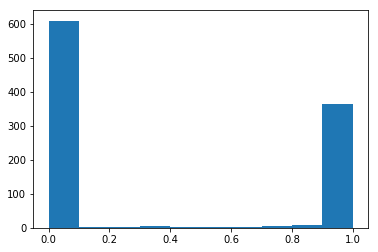

In [17]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.hist(output)

In [18]:
output

array([[  8.24996750e-05],
       [  1.68105442e-04],
       [  2.49325399e-06],
       [  1.28106430e-01],
       [  3.52079632e-09],
       [  3.34274583e-02],
       [  3.55966687e-02],
       [  9.99899387e-01],
       [  5.69768918e-06],
       [  1.06241757e-07],
       [  8.22276058e-13],
       [  9.99958038e-01],
       [  9.99996066e-01],
       [  1.00000000e+00],
       [  1.47228975e-05],
       [  1.00000000e+00],
       [  9.99914646e-01],
       [  2.58282267e-08],
       [  1.00000000e+00],
       [  1.59022406e-07],
       [  9.99034643e-01],
       [  2.52361502e-03],
       [  9.01780004e-05],
       [  5.51271739e-07],
       [  1.18045202e-04],
       [  8.53813106e-07],
       [  3.53458268e-03],
       [  9.94467526e-04],
       [  7.46684730e-01],
       [  9.99993920e-01],
       [  7.35080917e-04],
       [  1.00000000e+00],
       [  9.99963284e-01],
       [  1.34923763e-03],
       [  1.24164430e-07],
       [  4.28045372e-04],
       [  2.03783165e-05],
 

In [ ]:
np.median(output)

In [ ]:
output